<a href="https://colab.research.google.com/github/Vijaypurushoth988373/Face-Mask-Detection/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

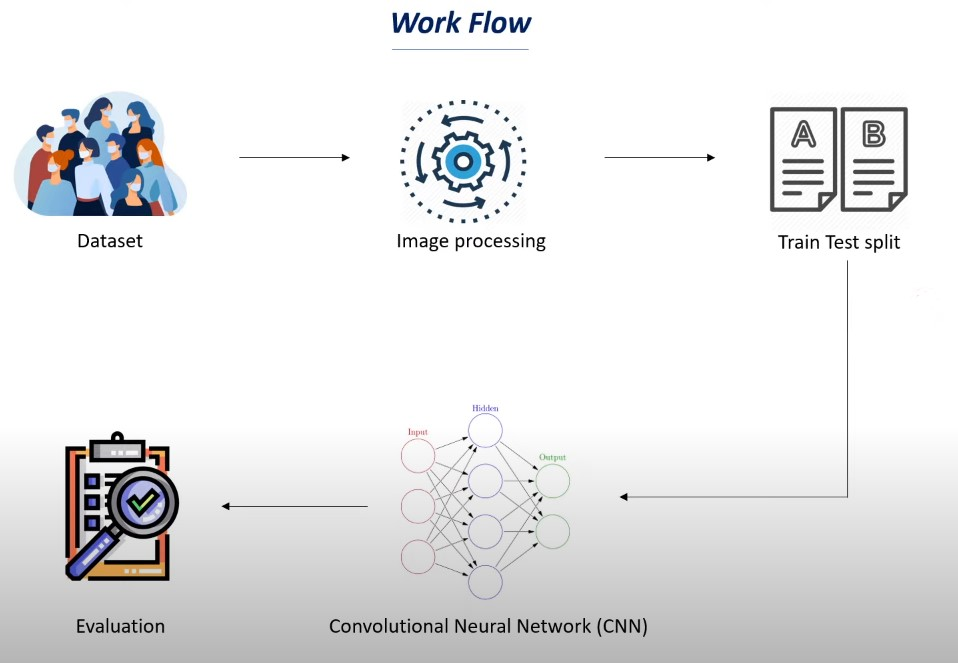

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 1. Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


# 2. Importing the Required libraries

In [ ]:
import os                                             # access the files which we have in the folders
import numpy as np                                    # convert images in numpy arrays
import matplotlib.pyplot as plt                       # visual the plots
import matplotlib.image as mpimg                      # visual the images
import cv2                                            # used for image processing
from google.colab.patches import cv2_imshow           # used to show/display the images
from PIL import Image                                 # used to read images and also some processing
from sklearn.model_selection import train_test_split  # used to split the dataset into train and test

In [ ]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2846.jpg', 'with_mask_1258.jpg', 'with_mask_3486.jpg', 'with_mask_3646.jpg', 'with_mask_2711.jpg']
['with_mask_2161.jpg', 'with_mask_1991.jpg', 'with_mask_2365.jpg', 'with_mask_3052.jpg', 'with_mask_1220.jpg']


In [ ]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1663.jpg', 'without_mask_985.jpg', 'without_mask_185.jpg', 'without_mask_3710.jpg', 'without_mask_3406.jpg']
['without_mask_1954.jpg', 'without_mask_2276.jpg', 'without_mask_1468.jpg', 'without_mask_1551.jpg', 'without_mask_3679.jpg']


In [ ]:
print("Number of mask images : ", len(with_mask_files))
print("Number of without mask images : ", len(without_mask_files))

Number of mask images :  3725
Number of without mask images :  3828


#### Creating labels for the two class of images :


*   With Mask --> 0
*   Without Mask --> 1



In [ ]:
# Creating labels 

with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


**Displaying the image**

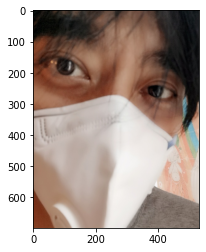

In [ ]:
# Displaying the image with mask

img = mpimg.imread("/content/data/with_mask/with_mask_500.jpg")
imgplot = plt.imshow(img)
plt.show()

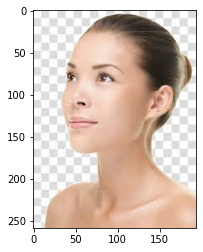

In [ ]:
# Displaying the image without mask

img = mpimg.imread("/content/data/without_mask/without_mask_2925.jpg")
imgplot = plt.imshow(img)
plt.show()

# 3. Image Preprocessing


*   Resize the Image
*   Convert the image to numpy array




In [ ]:
with_mask_path = "/content/data/with_mask/"

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

without_mask_path = "/content/data/without_mask/"
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0]

array([[[219, 213, 215],
        [219, 213, 215],
        [219, 213, 215],
        ...,
        [224, 218, 220],
        [224, 218, 220],
        [224, 218, 220]],

       [[219, 213, 215],
        [219, 213, 215],
        [219, 213, 215],
        ...,
        [224, 218, 220],
        [224, 218, 220],
        [224, 218, 220]],

       [[219, 213, 215],
        [219, 213, 215],
        [219, 213, 215],
        ...,
        [224, 218, 220],
        [224, 218, 220],
        [224, 218, 220]],

       ...,

       [[  7,   7,   9],
        [  7,   7,   9],
        [  6,   6,   8],
        ...,
        [228, 222, 224],
        [228, 222, 224],
        [228, 222, 224]],

       [[  7,   7,   9],
        [  6,   6,   8],
        [  5,   5,   7],
        ...,
        [228, 222, 224],
        [228, 222, 224],
        [228, 222, 224]],

       [[  6,   6,   8],
        [  6,   6,   8],
        [  5,   5,   7],
        ...,
        [229, 223, 225],
        [229, 223, 225],
        [228, 222, 224]]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# Converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


# 4. Splitting the Dataset into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)


In [ ]:
# Scaling the Data 

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[255, 255, 241],
        [255, 255, 246],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 246],
        [255, 255, 249],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 85,  78,  60],
        [ 90,  83,  65],
        [ 89,  82,  63]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 71,  64,  46],
        [ 74,  67,  49],
        [ 81,  73,  57]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [ 76,  69,  51],
        [ 79,  72,  54],
        [ 84,  77,  60]]

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 0.94509804],
        [1.        , 1.        , 0.96470588],
        [1.        , 1.        , 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 0.96470588],
        [1.        , 1.        , 0.97647059],
        [1.        , 1.        , 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 0.99607843],
        [1.        , 1.        , 0.99607843],
        [1.        , 1.        , 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

# 5. Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# Compile the Neural Network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
# Training the Neural Network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 5s 29ms/step - loss: 0.1594 - acc: 0.9360 - val_loss: 0.2032 - val_acc: 0.9388
Epoch 2/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1462 - acc: 0.9448 - val_loss: 0.2519 - val_acc: 0.9256
Epoch 3/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1150 - acc: 0.9557 - val_loss: 0.2594 - val_acc: 0.9107
Epoch 4/10
170/170 [==============================] - 3s 18ms/step - loss: 0.0975 - acc: 0.9656 - val_loss: 0.2608 - val_acc: 0.9256
Epoch 5/10
170/170 [==============================] - 3s 20ms/step - loss: 0.0784 - acc: 0.9726 - val_loss: 0.2826 - val_acc: 0.9207
Epoch 6/10
170/170 [==============================] - 3s 18ms/step - loss: 0.0902 - acc: 0.9674 - val_loss: 0.2251 - val_acc: 0.9289
Epoch 7/10
170/170 [==============================] - 3s 18ms/step - loss: 0.0730 - acc: 0.9744 - val_loss: 0.2585 - val_acc: 0.9174
Epoch 8/10
170/170 [==============================] - 3s 18ms/step - 

# 6. Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy = ", accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2910 - acc: 0.9272
Test Accuracy =  0.9272005558013916


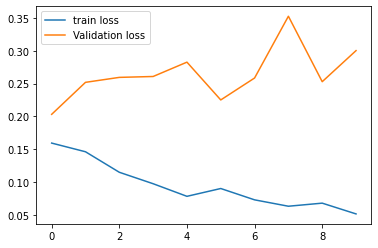

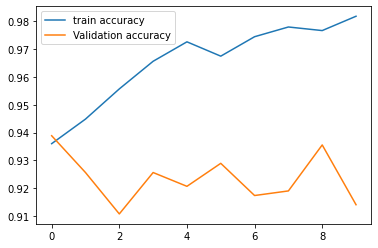

In [ ]:
h=history

#plot the loss valve
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

#plot the accuracy valve
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='Validation accuracy')
plt.legend()
plt.show()

# 7. Predictive System

Path of the Image : /content/download (1).jfif


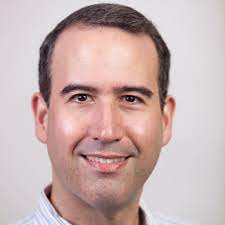

1/1 [==============================] - 0s 20ms/step
[[0.7214197  0.39928555]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input("Path of the Image : ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")
